# Data Cleaning

## Loading data

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# modifying read_csv lines to also use skipinitialspace=True
df = pd.read_csv('https://raw.githubusercontent.com/JulienAlardot/challenge-collecting-data/main/Data/database.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
df.head()

,Unnamed: 0,Url,Source,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Area,...,Terrace Area,Garden,Garden Area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Province,Region
0,0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1.0,NaN,...,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
1,1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1.0,NaN,...,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
2,2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2.0,153.0,...,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
3,3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3.0,NaN,...,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
4,4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2.0,80.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Vlaams-Brabant,Vlaams


## Rename columns and first selection

In [3]:
#deleting Unnamed column
df.drop("Unnamed: 0", inplace=True, axis=1)
df.head()

,Url,Source,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Area,Fully equipped kitchen,...,Terrace Area,Garden,Garden Area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Province,Region
0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1.0,NaN,0.0,...,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1.0,NaN,0.0,...,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2.0,153.0,0.0,...,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3.0,NaN,0.0,...,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2.0,80.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Vlaams-Brabant,Vlaams


In [4]:
old_col=(df.columns)
new_col=[]
# rename column in a pythonic way
for item in old_col:
    item =item.lower()
    item= item.replace(' ','_')
    new_col.append(item)

df.columns=new_col
df.head()

,url,source,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,...,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,province,region
0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1.0,NaN,0.0,...,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1.0,NaN,0.0,...,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2.0,153.0,0.0,...,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3.0,NaN,0.0,...,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2.0,80.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Vlaams-Brabant,Vlaams


## Remove duplicates

In [5]:
columns_restricted = ['locality', 'type_of_property', 'subtype_of_property',
           'price', 'type_of_sale', 'number_of_rooms', 'area',
           'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
           'terrace_area', 'garden', 'garden_area', 'surface_of_the_land',
           'surface_area_of_the_plot_of_land', 'number_of_facades',
           'swimming_pool', 'state_of_the_building'] # columns name without url and source
print(df.shape)
df = df[~df[columns_restricted].duplicated()]  #delete rows that differ only by url and source
df.index = list(range(len(df)))
df.shape  

(73510, 23)


(73441, 23)

In [6]:
value = (df['locality'] == df.loc[0, 'locality']) | df['locality'].isnull()
duplicates_datas = []
for i in range(20000):
    value = (df['locality'] == df.loc[i, 'locality']) | df['locality'].isnull()
    for col in columns_restricted:
        value = value & ((df[col] == df.loc[i, col]) | df[col].isnull())
    if len(df[value])>1:
        duplicates_datas.append(df[value])
        
#each element of duplicates_data is a dataframe that contains rows that differ only by NaN values

In [7]:
print(len(duplicates_datas))
duplicates_datas[-1].head()

2981


,url,source,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,...,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,province,region
19981,https://www.immoweb.be/fr/annonce/immeuble-a-a...,immoweb,4000,house,building,235000.0,regular sale,4.0,159.0,0.0,...,NaN,0.0,NaN,187.0,187.0,2.0,0.0,to renovate,Liège,Wallonie
26473,https://www.immoweb.be/fr/annonce/maison/a-ven...,immoweb,4000,house,NaN,235000.0,regular sale,4.0,159.0,0.0,...,NaN,0.0,NaN,187.0,187.0,2.0,0.0,to renovate,Liège,Wallonie


In [8]:
#drop all duplicates
for duplicate in duplicates_datas:
        for i in duplicate.index:
            try:
                df.drop(index=i, inplace=True)
            except:
                continue

df.index = list(range(len(df)))  #reset index
df.shape


(69903, 23)

## First analysis

In [9]:
df.dtypes

url                                  object
source                               object
locality                              int64
type_of_property                     object
subtype_of_property                  object
price                               float64
type_of_sale                         object
number_of_rooms                     float64
area                                float64
fully_equipped_kitchen              float64
furnished                           float64
open_fire                           float64
terrace                             float64
terrace_area                        float64
garden                              float64
garden_area                         float64
surface_of_the_land                 float64
surface_area_of_the_plot_of_land    float64
number_of_facades                   float64
swimming_pool                       float64
state_of_the_building                object
province                             object
region                          

In [10]:
#changing numeric types:
df=df.astype({'locality':'Int64', 
            'price':'float64', 
            'number_of_rooms':'Int64', 
            'area':'float64', 
            'fully_equipped_kitchen':'Int64', 
            'furnished':'Int64',
            'open_fire':'Int64',
            'terrace':'Int64',
            'terrace_area':'float64',
            'garden':'Int64',
            'garden_area':'float64',
            'surface_of_the_land':'float64',
            'surface_area_of_the_plot_of_land':'float64',
            'number_of_facades':'Int64',
            'swimming_pool':'Int64',
            })
df.dtypes


url                                  object
source                               object
locality                              Int64
type_of_property                     object
subtype_of_property                  object
price                               float64
type_of_sale                         object
number_of_rooms                       Int64
area                                float64
fully_equipped_kitchen                Int64
furnished                             Int64
open_fire                             Int64
terrace                               Int64
terrace_area                        float64
garden                                Int64
garden_area                         float64
surface_of_the_land                 float64
surface_area_of_the_plot_of_land    float64
number_of_facades                     Int64
swimming_pool                         Int64
state_of_the_building                object
province                             object
region                          

In [11]:
df.columns

Index(['url', 'source', 'locality', 'type_of_property', 'subtype_of_property',
       'price', 'type_of_sale', 'number_of_rooms', 'area',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_the_land',
       'surface_area_of_the_plot_of_land', 'number_of_facades',
       'swimming_pool', 'state_of_the_building', 'province', 'region'],
      dtype='object')

In [12]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
source - 0%
locality - 0%
type_of_property - 1%
subtype_of_property - 80%
price - 1%
type_of_sale - 0%
number_of_rooms - 1%
area - 15%
fully_equipped_kitchen - 0%
furnished - 29%
open_fire - 0%
terrace - 0%
terrace_area - 67%
garden - 0%
garden_area - 84%
surface_of_the_land - 51%
surface_area_of_the_plot_of_land - 51%
number_of_facades - 49%
swimming_pool - 0%
state_of_the_building - 43%
province - 0%
region - 0%


In [13]:
#we drop rows where price is nan:
df = df[~df['price'].isnull()]
df.index = list(range(len(df)))
df.head()

,url,source,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,...,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,province,region
0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1,NaN,0,...,11.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1,NaN,0,...,6.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2,153.0,0,...,62.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3,NaN,0,...,160.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2,80.0,0,...,NaN,0,NaN,NaN,NaN,<NA>,0,NaN,Vlaams-Brabant,Vlaams


In [14]:
df.shape[0]

69304

## Analysis of Categorical columns:

<AxesSubplot:>

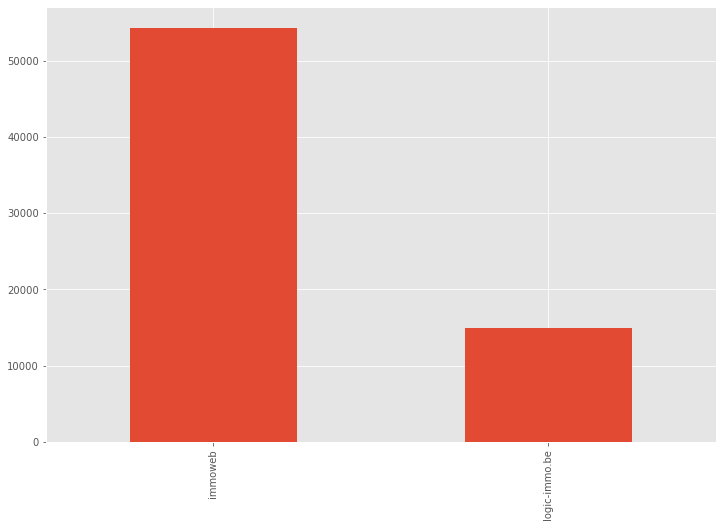

In [15]:
# bar chart -  distribution of a categorical variable
df['source'].value_counts().plot.bar()

<AxesSubplot:>

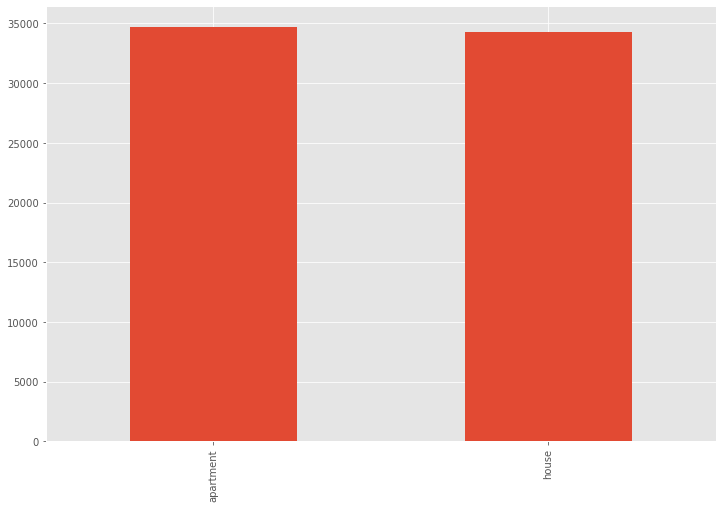

In [16]:
# bar chart -  distribution of a categorical variable
df['type_of_property'].value_counts().plot.bar()

<AxesSubplot:>

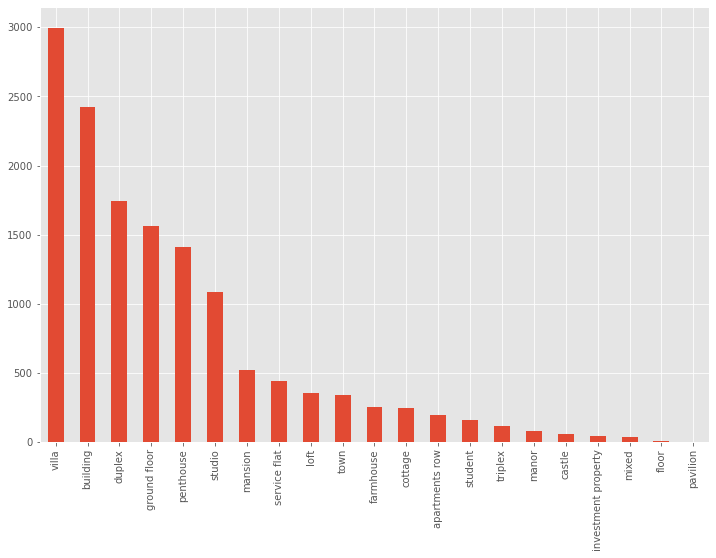

In [17]:
# bar chart -  distribution of a categorical variable (not including nan values)
df['subtype_of_property'].value_counts().plot.bar()

<AxesSubplot:>

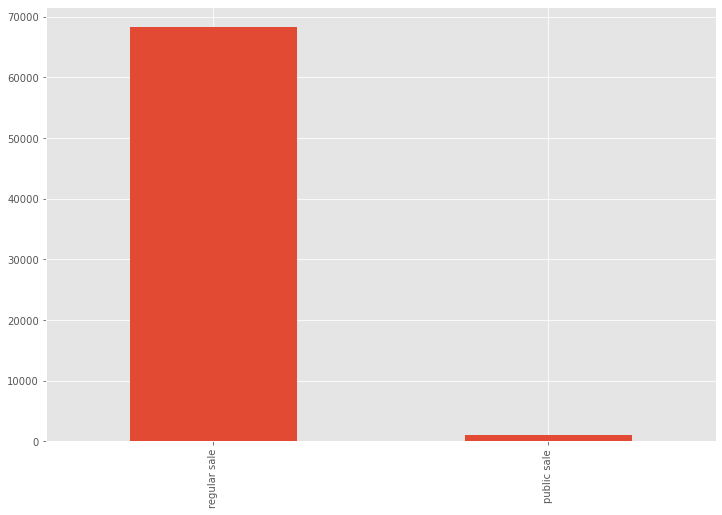

In [18]:
# bar chart -  distribution of a categorical variable
df["type_of_sale"].value_counts().plot.bar()

<AxesSubplot:>

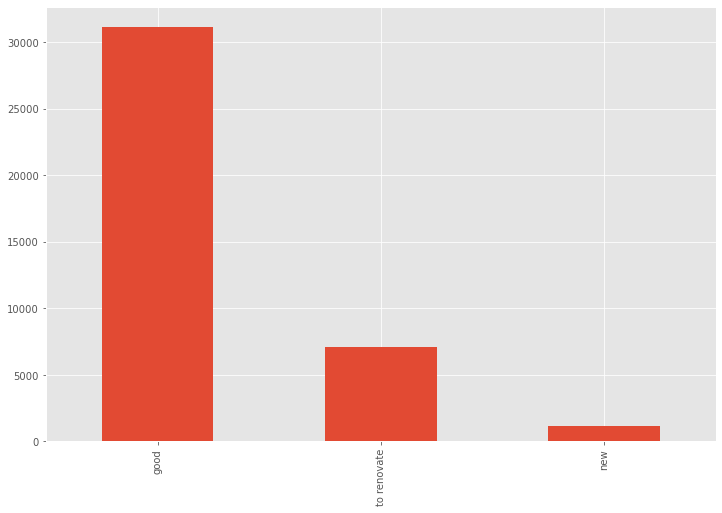

In [19]:
# bar chart -  distribution of a categorical variable
df['state_of_the_building'].value_counts().plot.bar()

<AxesSubplot:>

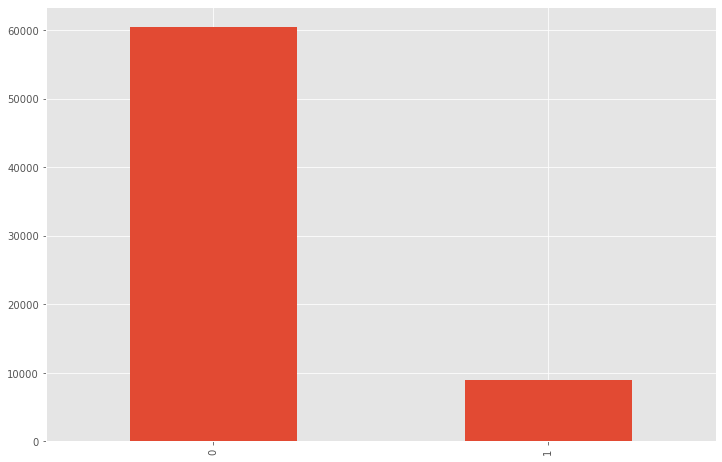

In [20]:
df['fully_equipped_kitchen'].value_counts().plot.bar()

<AxesSubplot:>

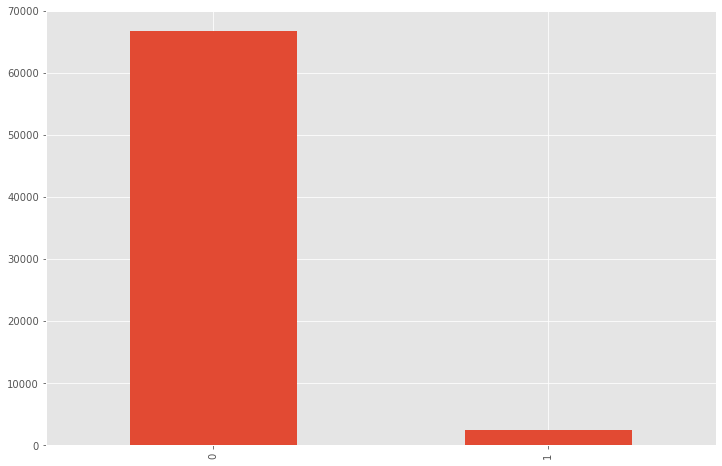

In [21]:
df['open_fire'].value_counts().plot.bar()

<AxesSubplot:>

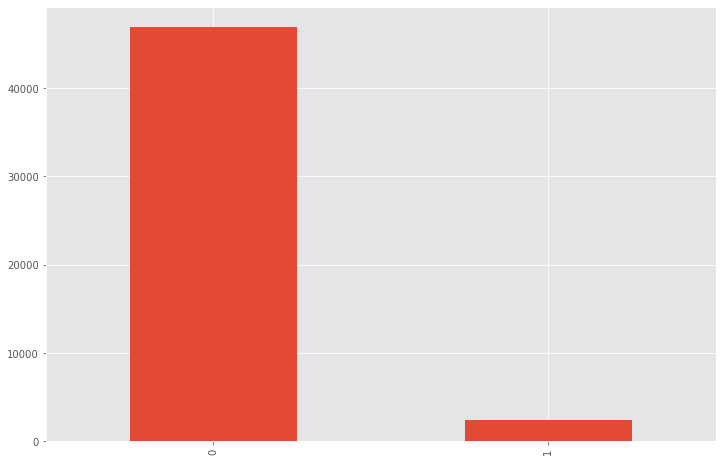

In [22]:
df['furnished'].value_counts().plot.bar()

<AxesSubplot:>

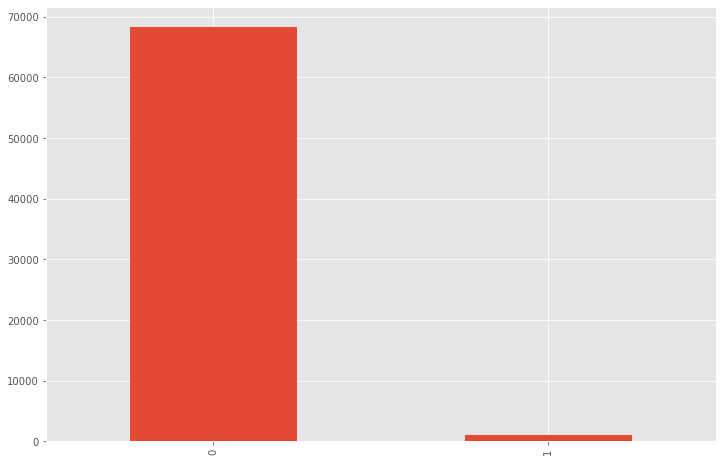

In [23]:
df['swimming_pool'].value_counts().plot.bar()

<AxesSubplot:>

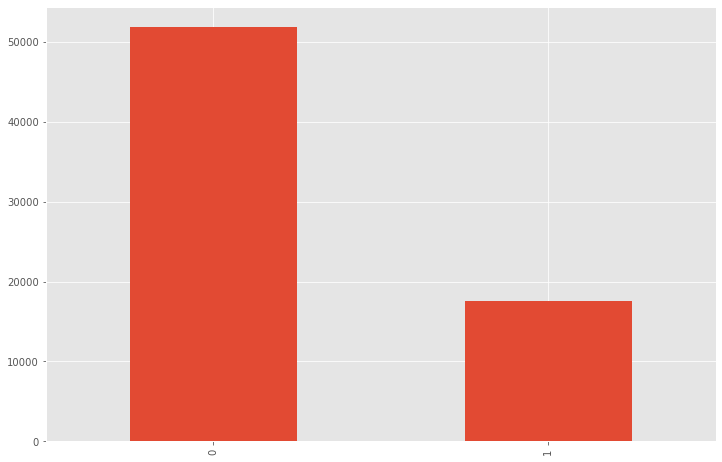

In [24]:
df['garden'].value_counts().plot.bar()

<AxesSubplot:>

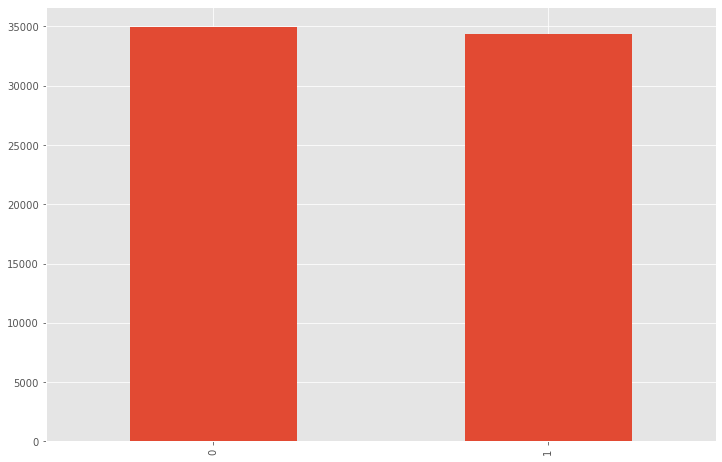

In [25]:
df['terrace'].value_counts().plot.bar()

## Analysis of Numerical columns

### price

<AxesSubplot:>

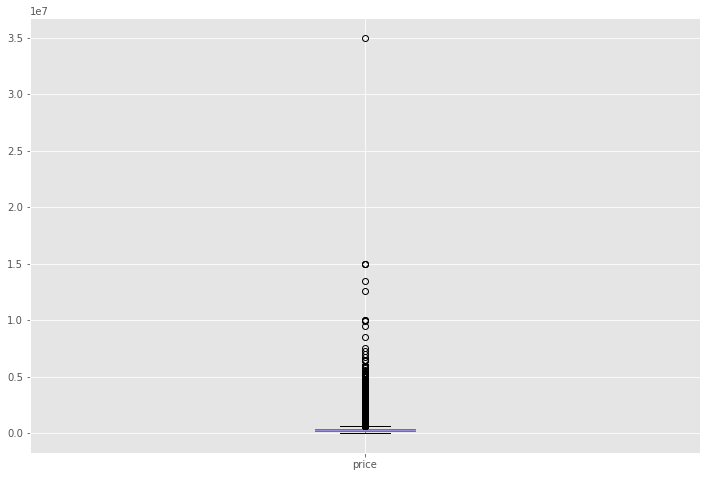

In [26]:
df.boxplot(column=['price'])

### Number of rooms

<AxesSubplot:>

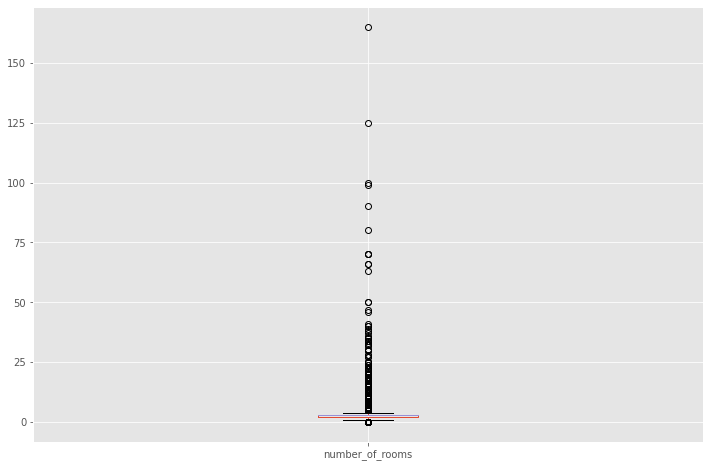

In [27]:
df.boxplot(column=['number_of_rooms'])

### Area

<AxesSubplot:>

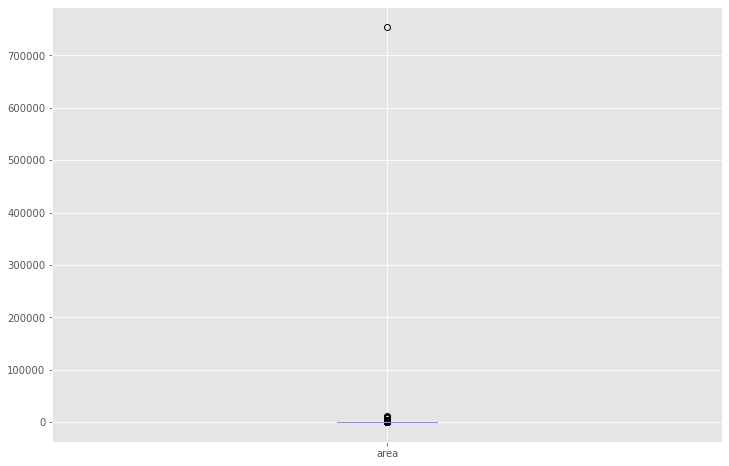

In [28]:
df.boxplot(column=['area'])

### Terrace Area

<AxesSubplot:>

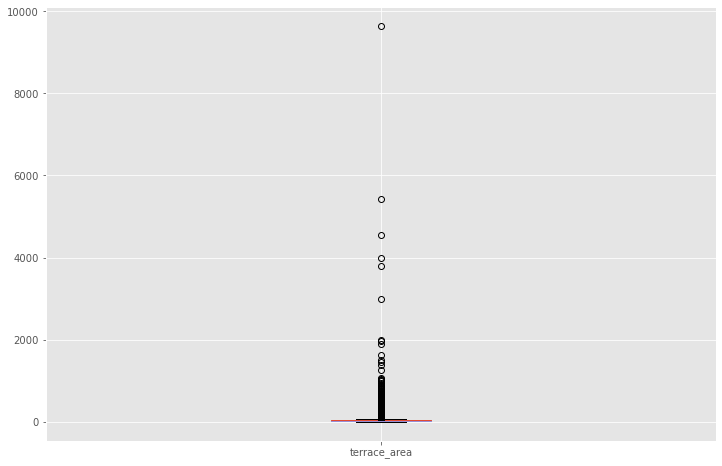

In [29]:
df.boxplot(column=['terrace_area'])

### Garden Area

<AxesSubplot:>

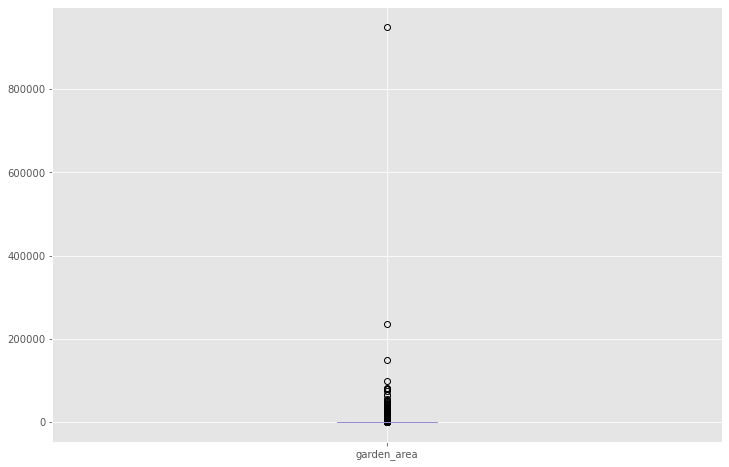

In [30]:
df.boxplot(column=['garden_area'])

### Surface of the land

<AxesSubplot:>

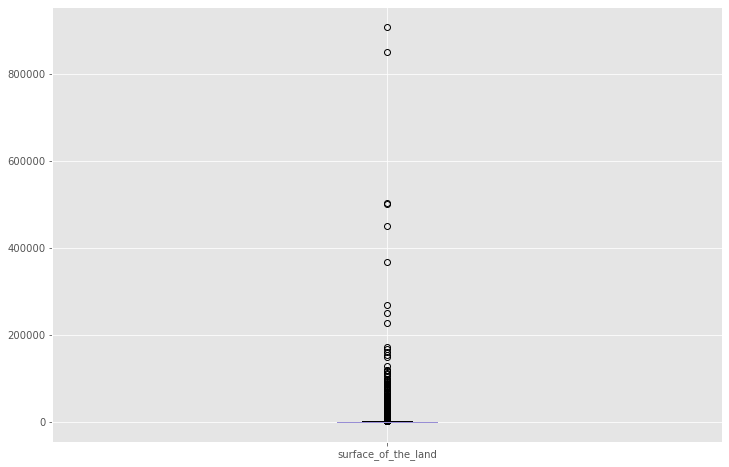

In [31]:
df.boxplot(column=['surface_of_the_land'])

### Surface area of the plot of land

<AxesSubplot:>

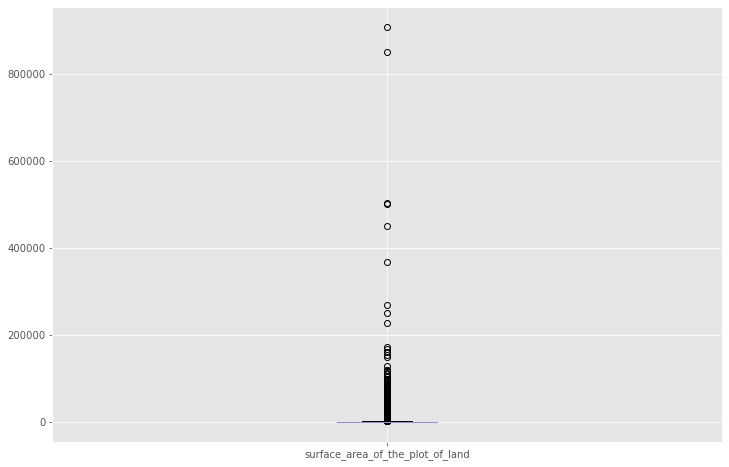

In [32]:
df.boxplot(column=['surface_area_of_the_plot_of_land'])

### Number of facade

<AxesSubplot:>

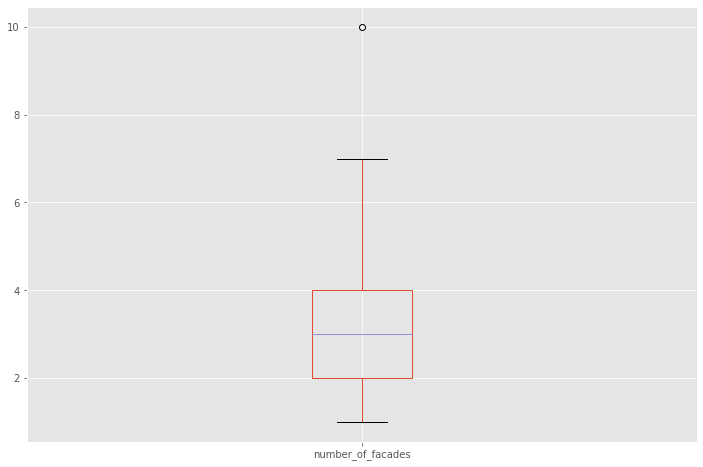

In [33]:
df.boxplot(column=['number_of_facades'])

In [34]:
#we drop url and source columns and move price as first columns:
df.drop(columns =['source', 'url'], inplace=True)
prices = df.pop('price')
df.insert(0, 'price', prices)

In [35]:
df.head()

,price,locality,type_of_property,subtype_of_property,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,furnished,open_fire,...,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,province,region
0,319799.0,2970,apartment,NaN,regular sale,1,NaN,0,0,0,...,11.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
1,291999.0,2970,apartment,NaN,regular sale,1,NaN,0,0,0,...,6.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
2,764999.0,2970,apartment,NaN,regular sale,2,153.0,0,0,0,...,62.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
3,660264.0,2970,apartment,NaN,regular sale,3,NaN,0,0,0,...,160.0,0,NaN,NaN,NaN,<NA>,0,NaN,Antwerp,Vlaams
4,294999.0,3200,apartment,NaN,regular sale,2,80.0,0,0,0,...,NaN,0,NaN,NaN,NaN,<NA>,0,NaN,Vlaams-Brabant,Vlaams


In [36]:
df.columns

Index(['price', 'locality', 'type_of_property', 'subtype_of_property',
       'type_of_sale', 'number_of_rooms', 'area', 'fully_equipped_kitchen',
       'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden',
       'garden_area', 'surface_of_the_land',
       'surface_area_of_the_plot_of_land', 'number_of_facades',
       'swimming_pool', 'state_of_the_building', 'province', 'region'],
      dtype='object')

# Removing Numerical features Outliers

In [37]:
# Started amount of rowns
df.shape[0]

69304

In [74]:
# Subset numerical data to remove outliers
df_outliers = df[['price', 'number_of_rooms', 'area', 'terrace_area', 'garden_area', 'surface_of_the_land','surface_area_of_the_plot_of_land' , 'number_of_facades']]
df_outliers.head()

,price,number_of_rooms,area,terrace_area,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades
0,319799.0,1,NaN,11.0,NaN,NaN,NaN,<NA>
1,291999.0,1,NaN,6.0,NaN,NaN,NaN,<NA>
2,764999.0,2,153.0,62.0,NaN,NaN,NaN,<NA>
3,660264.0,3,NaN,160.0,NaN,NaN,NaN,<NA>
4,294999.0,2,80.0,NaN,NaN,NaN,NaN,<NA>


In [75]:
df_outliers.shape[0]

69304

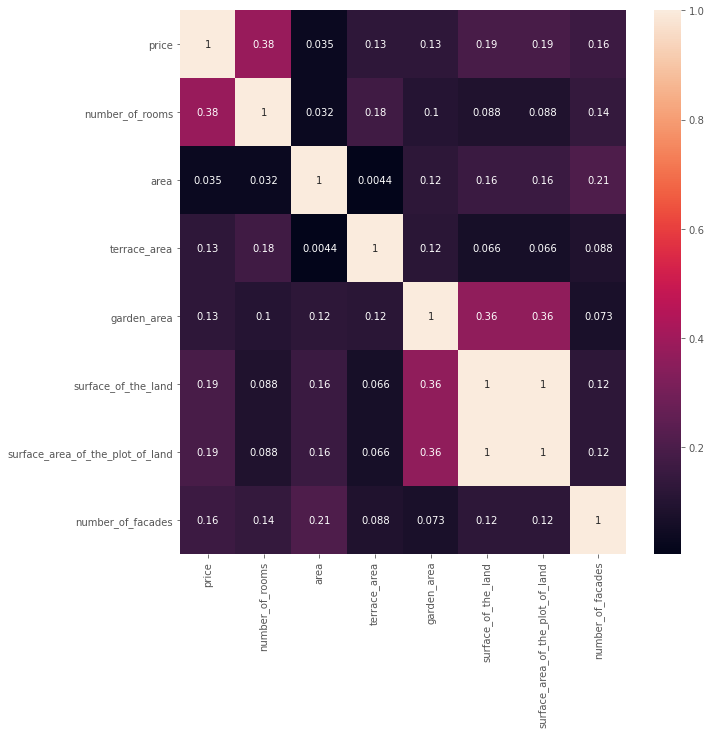

In [76]:
# plotting correlations between features
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_outliers.corr(), annot=True)
plt.show()

"Surface of the land" and "Surface area of the plot land" are the same, so one of them was deleted for futher analysis

### Price

<AxesSubplot:>

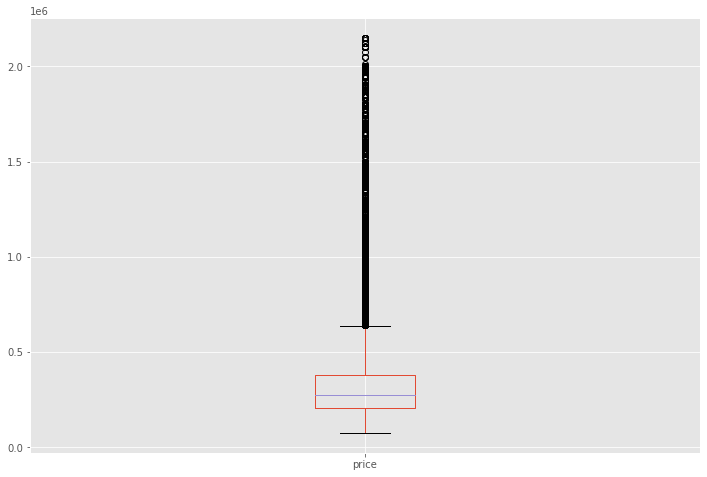

In [77]:
# to remove lower and upper outliers of Price based on quantile
q_low = df_outliers['price'].quantile(0.01)
q_hi  = df_outliers['price'].quantile(0.99)

df_filtered = df_outliers[(df_outliers['price'] < q_hi) & (df_outliers['price'] > q_low)]
# box plot.
df_filtered.boxplot(column=['price'])

In [78]:
df.shape[0]

69304

In [79]:
df_filtered.shape[0]

67900

### Number of rooms

<ipython-input-80-0659b9db6a88>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df_outliers['number_of_rooms'] < q_hi) & (df_filtered['number_of_rooms'] > q_low)]


<AxesSubplot:>

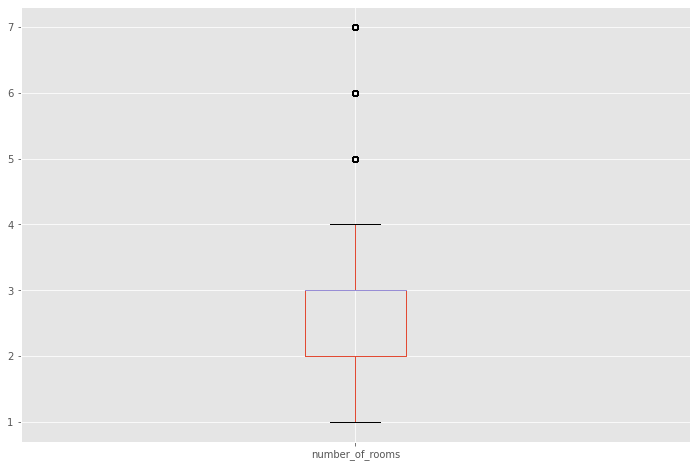

In [80]:
# to remove lower and upper outliers of 'Number of rooms'
q_low = df_filtered['number_of_rooms'].quantile(0.01)
q_hi  = df_filtered['number_of_rooms'].quantile(0.99)

df_filtered = df_filtered[(df_outliers['number_of_rooms'] < q_hi) & (df_filtered['number_of_rooms'] > q_low)]
# box plot.
df_filtered.boxplot(column=['number_of_rooms'])

In [81]:
df_filtered.shape[0]

65270

### Area

<AxesSubplot:>

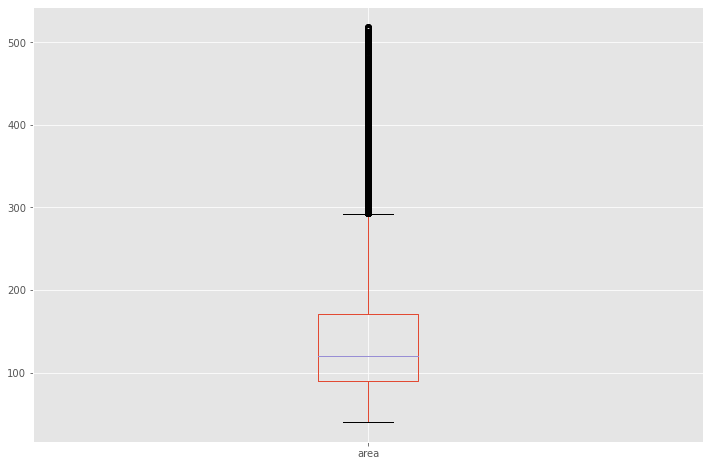

In [82]:
# to remove lower and upper outliers of 'Number of rooms'
q_low = df_filtered['area'].quantile(0.01)
q_hi  = df_filtered['area'].quantile(0.99)

df_filtered = df_filtered[(df_filtered['area'] < q_hi) & (df_filtered['area'] > q_low)]

# box plot.
df_filtered.boxplot(column=['area'])

In [83]:
df_filtered.shape[0]

54728

### Terrace Area

<AxesSubplot:>

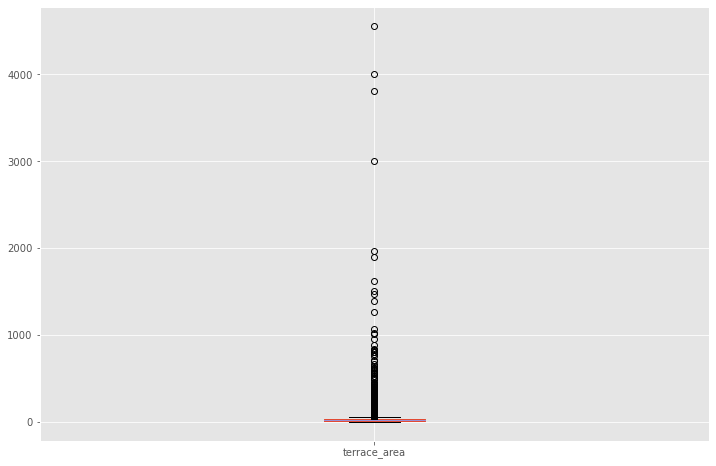

In [86]:
df_filtered = df_filtered.drop(df_filtered[df_filtered['terrace_area'] >6000].index)

df_filtered.boxplot(column=['terrace_area'])



In [87]:
df_filtered.shape[0]

54727

### Garden Area

<AxesSubplot:>

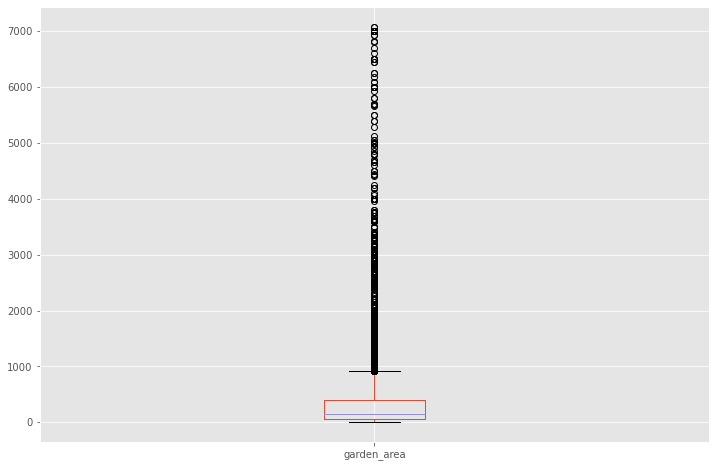

In [88]:
# to remove lower and upper outliers of 'Number of rooms'
q_low = df_filtered['garden_area'].quantile(0.01)
q_hi  = df_filtered['garden_area'].quantile(0.99)

df_filtered = df_filtered[(df_filtered['garden_area'] < q_hi) & (df_filtered['garden_area'] > q_low)]

# box plot.
df_filtered.boxplot(column=['garden_area'])

In [89]:
df_filtered.shape[0]

9567

### Surface of the land

<AxesSubplot:>

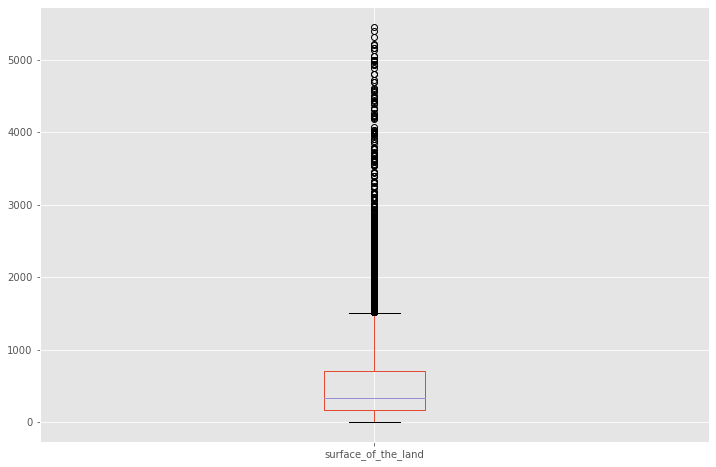

In [90]:
# to remove lower and upper outliers of 'Number of rooms'
q_low = df_filtered['surface_of_the_land'].quantile(0.01)
q_hi  = df_filtered['surface_of_the_land'].quantile(0.99)

df_filtered = df_filtered[(df_filtered['surface_of_the_land'] < q_hi) & (df_filtered['surface_of_the_land'] > q_low)]

# box plot.
df_filtered.boxplot(column=['surface_of_the_land'])

In [53]:
df_filtered.shape[0]

7238

### Number of facades

<AxesSubplot:>

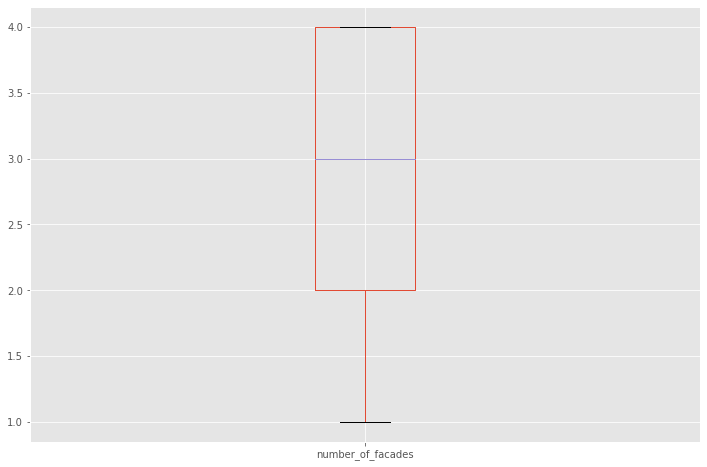

In [91]:
filtered = df_filtered.drop(df_filtered[df_filtered['number_of_facades'] > 4].index)
filtered.boxplot(column=['number_of_facades'])



In [92]:
df_filtered.shape[0]

7238

In [93]:
# Subset numerical data
df_categorical  = df[['type_of_property','locality', 'subtype_of_property', 'type_of_sale', 'fully_equipped_kitchen', 'type_of_sale', 'fully_equipped_kitchen','furnished', 'open_fire', 'terrace', 'garden','swimming_pool', 'state_of_the_building', 'province', 'region' ]]

In [94]:
df_categorical.shape[0]

69304

In [95]:
# Subset numerical data
df_filtered = df[['price', 'number_of_rooms', 'area', 'terrace_area', 'garden_area', 'surface_of_the_land','surface_area_of_the_plot_of_land' , 'number_of_facades']]

In [96]:
## joining categorical data frame and numerical

df = pd.concat([df_filtered, df_categorical], axis=1, join="inner")
df.shape[0]

69304

In [97]:
df.to_csv(r'/home/jessica/BecodeContent/immoDataAnalysis/challenge-data-analysis/DataCleaning/raw_data_cleaned.csv')